In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [56]:

print(df.isnull().sum())
print("*********")
print(df.duplicated().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
*********
0


In [57]:
columns_to_fix = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


for col in columns_to_fix:
  df[col] = df[col].replace(0, np.nan)


df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


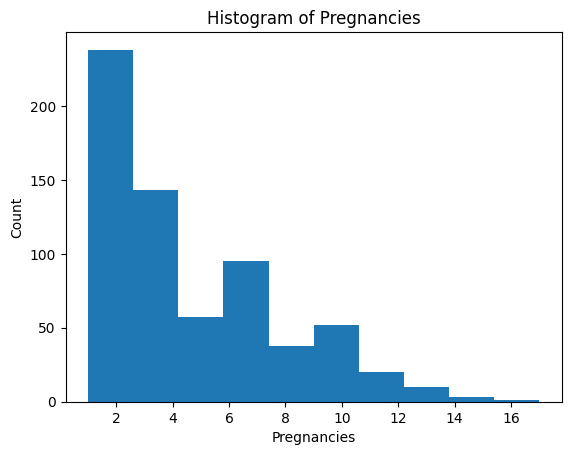

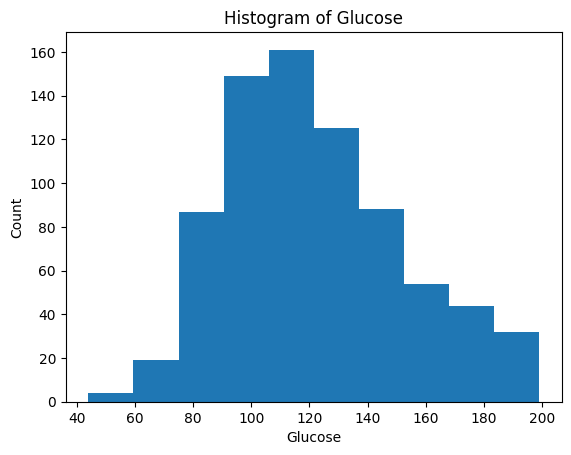

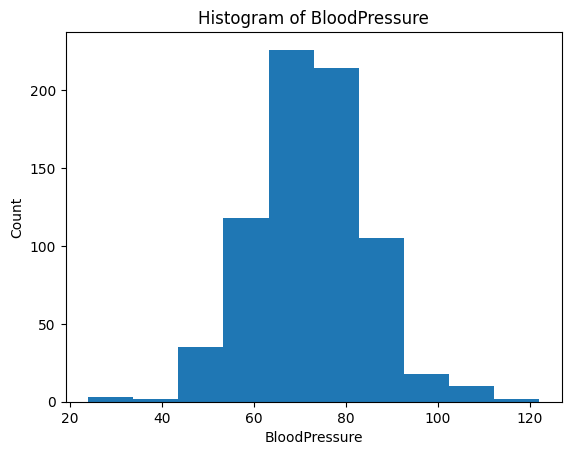

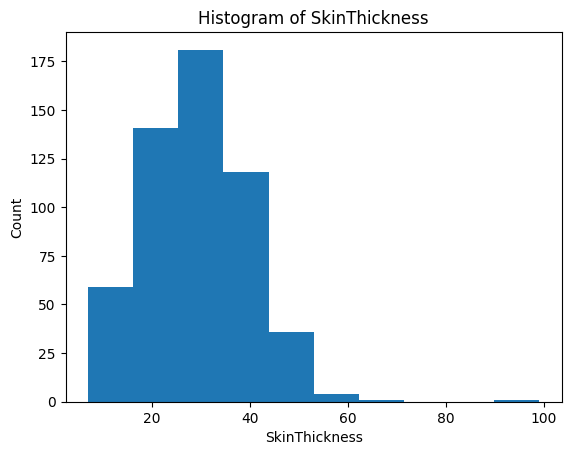

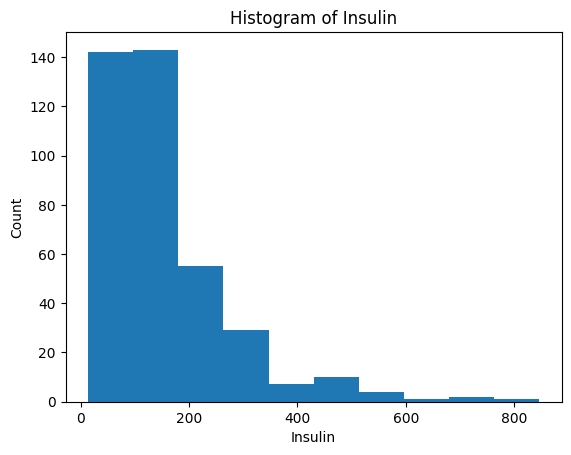

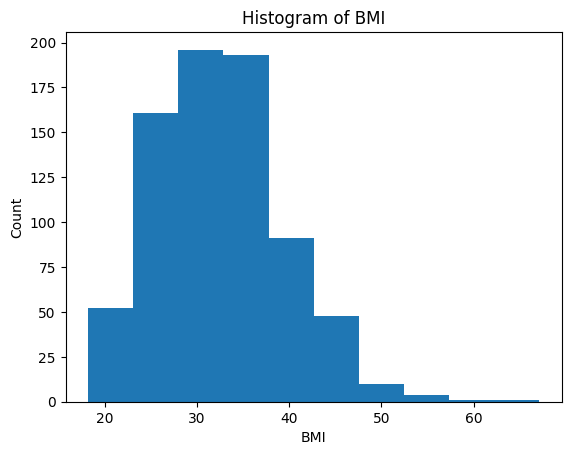

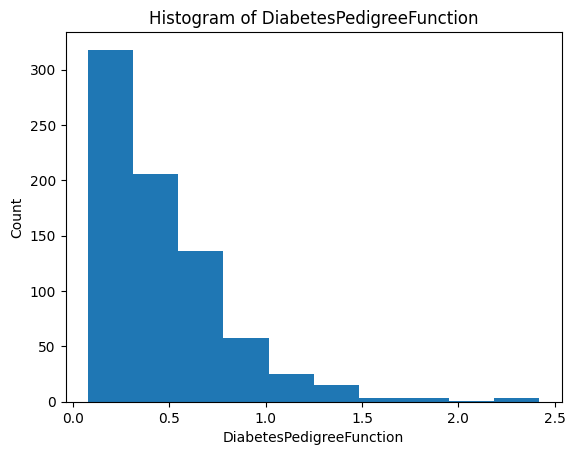

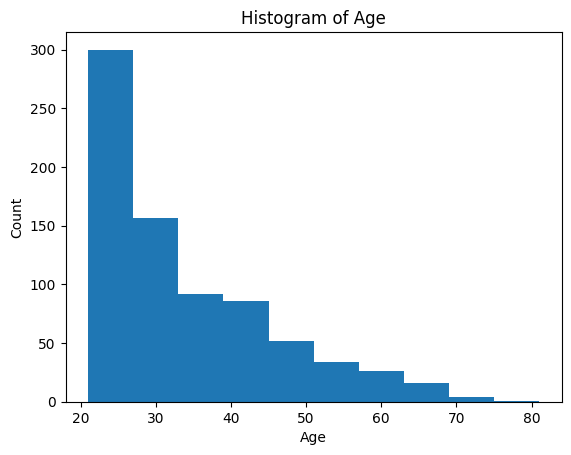

In [58]:
for col in columns_to_fix:
  plt.figure()
  plt.hist(df[col])
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()


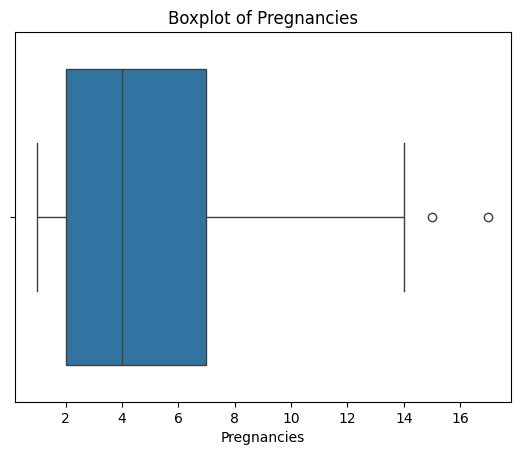

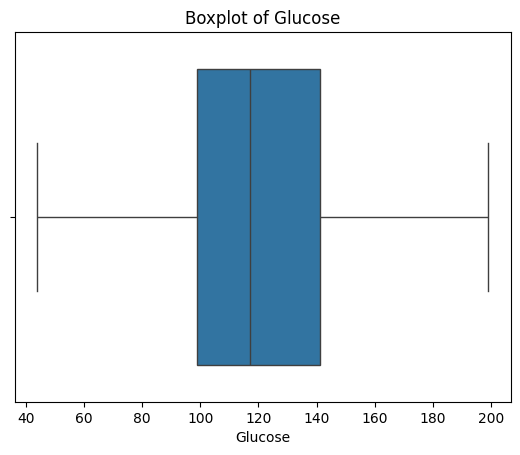

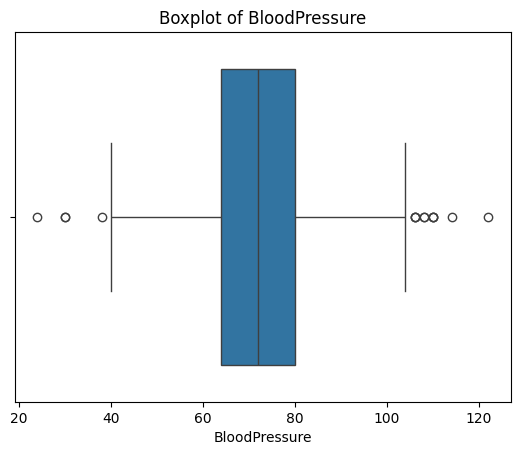

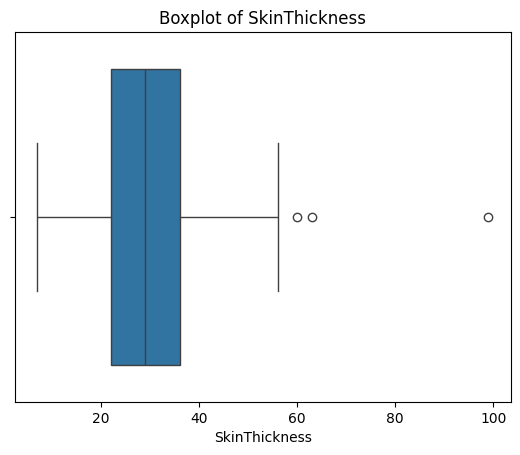

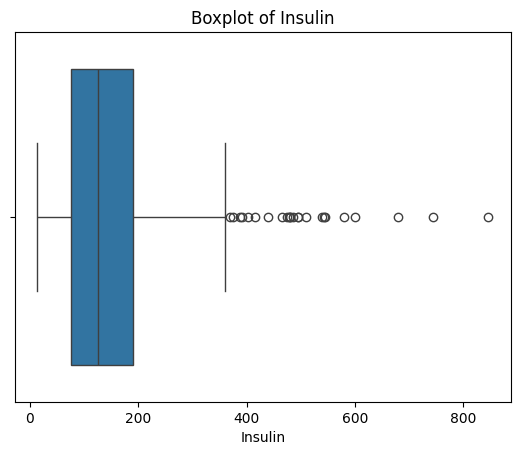

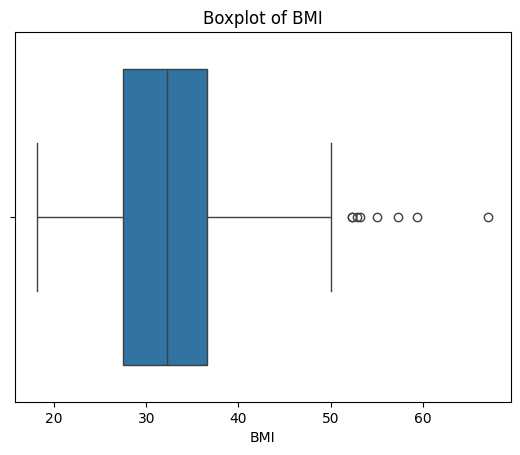

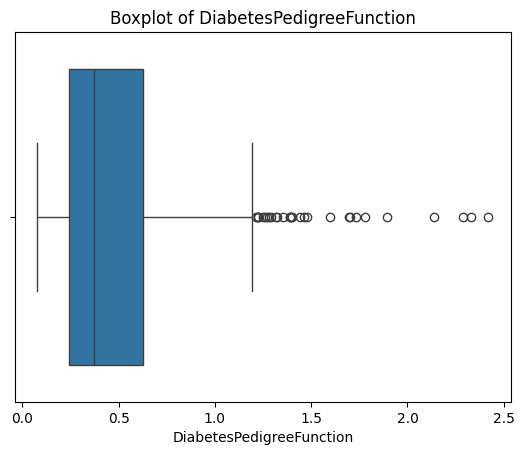

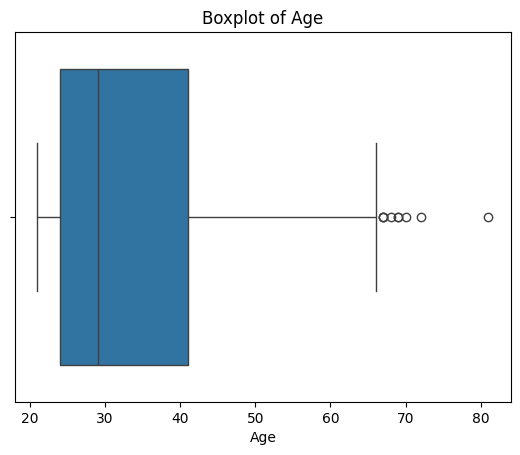

In [59]:
for col in columns_to_fix:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [60]:
df.skew()

,0
Pregnancies,0.885535
Glucose,0.530989
BloodPressure,0.134153
SkinThickness,0.690619
Insulin,2.166464
BMI,0.593970
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


In [61]:
for col in columns_to_fix:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
  print(f"{col}: {outliers}")

Pregnancies: 2
Glucose: 0
BloodPressure: 14
SkinThickness: 3
Insulin: 24
BMI: 8
DiabetesPedigreeFunction: 29
Age: 9


In [62]:
for col in columns_to_fix:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[col] = np.where(df[col] < lower_bound, lower_bound,
  np.where(df[col] > upper_bound, upper_bound, df[col]))


In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.490107,121.686763,72.375171,29.059150,146.500000,32.394716,0.458914,33.199870,0.348958
std,3.201487,30.535641,11.973207,10.057253,90.348842,6.715793,0.285596,11.628404,0.476951
min,1.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,14.500000,199.000000,104.000000,57.000000,360.625000,50.250000,1.200000,66.500000,1.000000


In [64]:
X = df[columns_to_fix]
y = df['Outcome']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [66]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)


X_train.isnull().sum(), X_test.isnull().sum()

(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 dtype: int64,
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 dtype: int64)

In [67]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
X_train_norm = pd.DataFrame(normalizer.fit_transform(X_train), columns=X.columns)
X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=X.columns)


X_train_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,0.249548,0.216793,0.0,0.074074,0.222222,0.370370,1.0
Glucose,614.0,0.459238,0.209817,0.0,0.300699,0.426573,0.587413,1.0
BloodPressure,614.0,0.501680,0.184203,0.0,0.375000,0.500000,0.625000,1.0
SkinThickness,614.0,0.439381,0.169779,0.0,0.360000,0.440000,0.500000,1.0
Insulin,614.0,0.345152,0.183309,0.0,0.303797,0.318264,0.332731,1.0
BMI,614.0,0.442717,0.206597,0.0,0.294072,0.443058,0.570983,1.0
DiabetesPedigreeFunction,614.0,0.341405,0.257436,0.0,0.144265,0.267473,0.497536,1.0
Age,614.0,0.270752,0.256739,0.0,0.065934,0.175824,0.439560,1.0


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.152028,-1.056427,-0.858066,-2.000582,-1.442128,-0.784321,0.400579,-0.798419
1,0.215814,0.144399,0.500239,-0.232144,-1.773858,-0.421565,-0.090600,0.572372
2,-0.810067,-0.556083,-1.197642,1.300503,-0.636498,0.379520,-0.836078,-0.712745
3,-1.152028,0.811525,-1.367431,0.003648,-0.146801,-0.406451,0.344842,-0.370047
4,-0.126147,-0.889646,-0.688278,1.182608,-0.462734,1.845656,-0.344899,-0.969768


In [69]:
X_train_scaled['Gender'] = np.random.choice(['Male','Female'], size=len(X_train_scaled))
X_test_scaled['Gender'] = np.random.choice(['Male','Female'], size=len(X_test_scaled))



X_train_encoded = pd.get_dummies(X_train_scaled, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_scaled, drop_first=True)


X_train_encoded.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Gender_Male
0,-1.152028,-1.056427,-0.858066,-2.000582,-1.442128,-0.784321,0.400579,-0.798419,True
1,0.215814,0.144399,0.500239,-0.232144,-1.773858,-0.421565,-0.090600,0.572372,False
2,-0.810067,-0.556083,-1.197642,1.300503,-0.636498,0.379520,-0.836078,-0.712745,True
3,-1.152028,0.811525,-1.367431,0.003648,-0.146801,-0.406451,0.344842,-0.370047,True
4,-0.126147,-0.889646,-0.688278,1.182608,-0.462734,1.845656,-0.344899,-0.969768,True


In [70]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_encoded, y_train)
y_pred_log = log_reg.predict(X_test_encoded)

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
print('Accuracy:', accuracy_score(y_test, y_pred_log))
print('Precision:', precision_score(y_test, y_pred_log))
print('Recall:', recall_score(y_test, y_pred_log))
print('F1 Score:', f1_score(y_test, y_pred_log))
print('ROC AUC:', roc_auc_score(y_test, log_reg.predict_proba(X_test_encoded)[:,1]))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.7077922077922078
Precision: 0.5957446808510638
Recall: 0.5185185185185185
F1 Score: 0.5544554455445545
ROC AUC: 0.8090740740740742
[[81 19]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier


models = {
'KNN': KNeighborsClassifier(),
'SVM': SVC(probability=True),
'DecisionTree': DecisionTreeClassifier(),
'RandomForest': RandomForestClassifier(),
'AdaBoost': AdaBoostClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier())
}


results = {}
for name, model in models.items():
  model.fit(X_train_encoded, y_train)
  y_pred = model.predict(X_test_encoded)
  results[name] = {
  'Accuracy': accuracy_score(y_test, y_pred),
  'Precision': precision_score(y_test, y_pred),
  'Recall': recall_score(y_test, y_pred),
  'F1': f1_score(y_test, y_pred),
  'ROC_AUC': roc_auc_score(y_test, model.predict_proba(X_test_encoded)[:,1])
  }


pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1,ROC_AUC
KNN,0.746753,0.653061,0.592593,0.621359,0.786852
SVM,0.753247,0.681818,0.555556,0.612245,0.809630
DecisionTree,0.694805,0.574468,0.500000,0.534653,0.650000
RandomForest,0.727273,0.615385,0.592593,0.603774,0.816111
AdaBoost,0.746753,0.659574,0.574074,0.613861,0.818519
GradientBoosting,0.766234,0.687500,0.611111,0.647059,0.818148
Bagging,0.772727,0.720930,0.574074,0.639175,0.775370


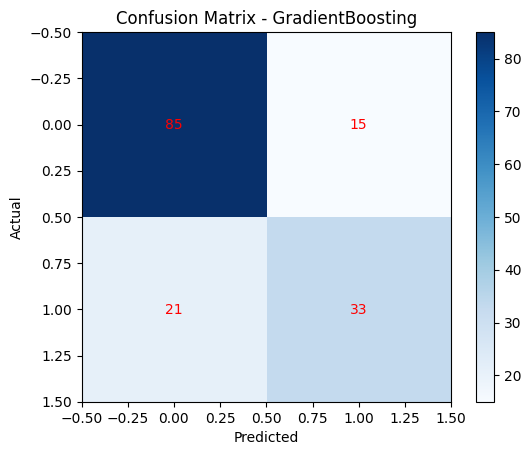

In [73]:
best_model_name = max(results, key=lambda k: results[k]['F1'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_encoded)


cm = confusion_matrix(y_test, y_pred_best)
plt.imshow(cm, cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

The Gradient Boosting Classifier is the best-performing model because it provides the highest F1 score and recall, while also maintaining strong accuracy and ROC-AUC. This makes it the most reliable for correctly identifying diabetic patients